# Scikit-learn 전처리 (Preprocessing)

## 학습 목표
1. **결측치(Missing Value) 처리** 방법을 이해하고 `SimpleImputer`를 사용할 수 있다
2. **라벨 인코딩(Label Encoding)**을 통해 범주형 데이터를 수치형으로 변환할 수 있다
3. **원-핫 인코딩(One-Hot Encoding)**의 필요성을 이해하고 적용할 수 있다
4. **정규화(Normalization)**와 **표준화(Standardization)**의 차이를 이해하고 적절히 활용할 수 있다

## 주요 내용
- 타이타닉 데이터셋을 활용한 전처리 실습
- `SimpleImputer`: 결측치 처리 (mean, median, most_frequent)
- `LabelEncoder`: 문자형 → 수치형 변환
- `pd.get_dummies()`: 원-핫 인코딩
- `MinMaxScaler`: 정규화 (0~1 범위로 스케일링)
- `StandardScaler`: 표준화 (평균 0, 표준편차 1)

**Kaggle에서 Hello world로 많이 사용**

## 타이타닉 데이터셋으로 전처리 연습하기

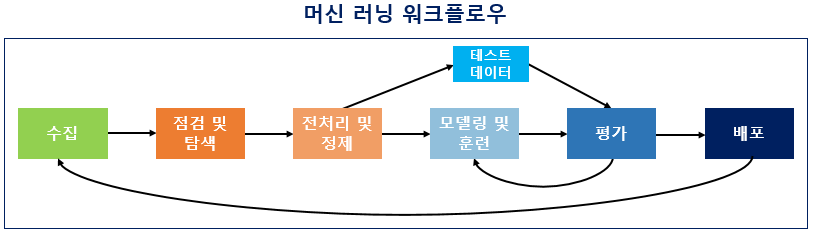

In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('data/titanic/train.csv')

In [3]:
type(train)

pandas.core.frame.DataFrame

In [4]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


## 데이터 셋: 타이타닉 데이터셋 (출처: Kaggle.com)

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* PassengerId: 승객 아이디
* Survived: 생존 여부, 1: 생존, 0: 사망
* Pclass: 등급
* Name: 성함
* Sex: 성별
* Age: 나이
* SibSp: 형제, 자매, 배우자 수
* Parch: 부모, 자식 수
* Ticket: 티켓번호
* Fare: 요즘
* Cabin: 좌석번호
* Embarked: 탑승 항구

In [6]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 전처리: train / validation 세트 나누기

1. 먼저, feature 와 label을 정의합니다.
2. feature / label을 정의했으면, 적절한 비율로 train / validation set을 나눕니다.

In [10]:
# 전체 데이터중 학습에 사용할 데이터를 선택하자.
feature = ['Pclass', 'Sex', 'Age', 'Fare']

In [11]:
# 예측 해야할 값
label = ['Survived']

In [12]:
train[feature].head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [13]:
train[feature].shape

(891, 4)

In [14]:
train[label].head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [15]:
# 전체 데이터수를 확인해 보자
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
from sklearn.model_selection import train_test_split

* **test_size**: validation set에 할당할 비율 (20% -> 0.2)
* **shuffle**: 셔플 옵션 (기본 True)
* **random_state**: 랜덤 시드값

전체 데이터를 train data와 validation data의 비율을 8:2로 나눈다.

In [17]:
x_train, x_valid, y_train, y_valid = train_test_split(train[feature], train[label], test_size=0.2, shuffle=True, random_state=30)

In [16]:
x_train.shape, y_train.shape

((712, 4), (712, 1))

In [17]:
x_valid.shape, y_valid.shape

((179, 4), (179, 1))

## 전처리: 결측치

In [18]:
#전체 데이터수 891개와 비교해서 갯수가 부족한 항목을 확인하자
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


결측치를 확인하는 방법은 pandas의 **isnull()** 

그리고 합계를 구하는 sum()을 통해 한 눈에 확인할 수 있습니다.

In [20]:
# train.isnull() 만 하면 T/F로 나와서 .sum() 붙여서 갯수확인
train.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

개별 column의 결측치에 대하여 확인하는 방법은 다음과 같습니다.

In [22]:
train['Age'].isnull().sum()

np.int64(177)

[Impute 도큐먼트](https://scikit-learn.org/stable/modules/impute.html)

### 1. 수치형 (Numerical Column) 데이터에 대한 결측치 처리

In [21]:
# 수치형 데이터는 대체로 평균 값을 구한뒤, 평균 값으로 채워준다.

In [24]:
# 0으로 채웠을때의 통계값을 출력해보자
train['Age'].fillna(0).describe()

count    891.000000
mean      23.799293
std       17.596074
min        0.000000
25%        6.000000
50%       24.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
train['Age'].mean()

np.float64(29.69911764705882)

In [ ]:
# 평균 값으로 채웠을때의 통계값을 출력해보자 (기존 통계값 안 건들이니까 평균치가 안변함. 통계치는 괜찮지만 하나하나 볼때는 훼손됐을 수 있음)
train['Age'].fillna(train['Age'].mean()).describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### 사이킷런의 imputer를 활용하면 2개 이상의 column을 한 번에 처리할 수 있다.

In [ ]:
from sklearn.impute import SimpleImputer

In [28]:
# 입력으로 넣는 데이터의 평균치를 사용해서 Nan값을 채워주는 imputer 생성
# 입력으로 넣을수 있는 항목은 숫자

# 1. imputer 모델 생성
imputer = SimpleImputer(strategy='mean')

fit() 을 통해 결측치에 대한 학습을 진행합니다.

In [29]:
# fit은 학습하는데 사용하는 메소드
# fit함수를 통해서 imputer의 평균값을 계산
imputer.fit(train[['Age']])

,"missing_values missing_values: int, float, str, np.nan, None or pandas.NA, default=np.nanThe placeholder for the missing values. All occurrences of`missing_values` will be imputed. For pandas' dataframes withnullable integer dtypes with missing values, `missing_values`can be set to either `np.nan` or `pd.NA`.",nan
,"strategy strategy: str or Callable, default='mean'The imputation strategy.- If ""mean"", then replace missing values using the mean along each column. Can only be used with numeric data.- If ""median"", then replace missing values using the median along each column. Can only be used with numeric data.- If ""most_frequent"", then replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.- If ""constant"", then replace missing values with fill_value. Can be used with strings or numeric data.- If an instance of Callable, then replace missing values using the scalar statistic returned by running the callable over a dense 1d array containing non-missing values of each column... versionadded:: 0.20 strategy=""constant"" for fixed value imputation... versionadded:: 1.5 strategy=callable for custom value imputation.",'mean'
,"fill_value fill_value: str or numerical value, default=NoneWhen strategy == ""constant"", `fill_value` is used to replace alloccurrences of missing_values. For string or object data types,`fill_value` must be a string.If `None`, `fill_value` will be 0 when imputing numericaldata and ""missing_value"" for strings or object data types.",None
,"copy copy: bool, default=TrueIf True, a copy of X will be created. If False, imputation willbe done in-place whenever possible. Note that, in the following cases,a new copy will always be made, even if `copy=False`:- If `X` is not an array of floating values;- If `X` is encoded as a CSR matrix;- If `add_indicator=True`.",True
,"add_indicator add_indicator: bool, default=FalseIf True, a :class:`MissingIndicator` transform will stack onto outputof the imputer's transform. This allows a predictive estimatorto account for missingness despite imputation. If a feature has nomissing values at fit/train time, the feature won't appear onthe missing indicator even if there are missing values attransform/test time.",False
,"keep_empty_features keep_empty_features: bool, default=FalseIf True, features that consist exclusively of missing values when`fit` is called are returned in results when `transform` is called.The imputed value is always `0` except when `strategy=""constant""`in which case `fill_value` will be used instead... versionadded:: 1.2",False


transform() 은 실제 결측치에 대한 처리를 해주는 함수합니다.

---



In [30]:
# transform에서 null값을 채워준다.
result = imputer.transform(train[['Age']])

In [31]:
result

array([[22.        ],
       [38.        ],
       [26.        ],
       [35.        ],
       [35.        ],
       [29.69911765],
       [54.        ],
       [ 2.        ],
       [27.        ],
       [14.        ],
       [ 4.        ],
       [58.        ],
       [20.        ],
       [39.        ],
       [14.        ],
       [55.        ],
       [ 2.        ],
       [29.69911765],
       [31.        ],
       [29.69911765],
       [35.        ],
       [34.        ],
       [15.        ],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.69911765],
       [19.        ],
       [29.69911765],
       [29.69911765],
       [40.        ],
       [29.69911765],
       [29.69911765],
       [66.        ],
       [28.        ],
       [42.        ],
       [29.69911765],
       [21.        ],
       [18.        ],
       [14.        ],
       [40.        ],
       [27.        ],
       [29.69911765],
       [ 3.        ],
       [19.        ],
       [29

In [32]:
#결과값은 numpy.ndarray로 저장된다.
type(result)

numpy.ndarray

In [30]:
train[['Age']] = result

In [31]:
# Age의 Nan이 하나도 없다.
train[['Age']].isnull().sum()

Age    0
dtype: int64

In [32]:
train[['Age']].describe()

,Age
count,891.000000
mean,29.699118
std,13.002015
min,0.420000
25%,22.000000
50%,29.699118
75%,35.000000
max,80.000000


#### fit_transform()은 fit()과 transform()을 한 번에 해주는 함수 입니다.

In [33]:
train = pd.read_csv('data/titanic/train.csv')

In [34]:
train[['Age']].isnull().sum()

Age    177
dtype: int64

In [33]:
# 중앙값(median)은 n개의 값을 크기 순으로 늘어놓았을 때 가장 가운데에 있는 숫자이다
# 예) 1,1,2,3,4,5,5,5,5,7,8,9,10,11,24의 경우 평균값은 100/25 = 6.666이지만
#     중앙값은 5이다
#imputer = SimpleImputer(strategy='mean')
imputer = SimpleImputer(strategy='median')

In [34]:
#result = imputer.fit_transform(train[['Age']])
train[['Age']] = imputer.fit_transform(train[['Age']])

In [ ]:
# train[['Age']] = result

In [36]:
train[['Age']].isnull().sum()

Age    0
dtype: int64

In [ ]:
train[['Age', 'Pclass']].describe()

,Age,Pclass
count,891.000000,891.000000
mean,29.699118,2.308642
std,13.002015,0.836071
min,0.420000,1.000000
25%,22.000000,2.000000
50%,29.699118,3.000000
75%,35.000000,3.000000
max,80.000000,3.000000


: 

### 2.  (Categorical Column) 데이터에 대한 결측치 처리
문자형 데이터의 결측치를 채워줄 경우는 가장 빈도수가 높은 것으로 채워준다.

In [40]:
train = pd.read_csv('data/titanic/train.csv')

1개의 column을 처리하는 경우

In [41]:
train['Embarked'].fillna('S')

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

Imputer를 사용하는 경우 : 2개 이상의 column을 처리할 때

In [42]:
imputer = SimpleImputer(strategy='most_frequent')

In [43]:
train[['Embarked']] = imputer.fit_transform(train[['Embarked']])

In [44]:
train[['Embarked']].isnull().sum()

Embarked    0
dtype: int64

## Label Encoding : 문자(categorical)를 수치(numerical)로 변환

학습을 위해서 모든 문자로된 **데이터는 수치로 변환**하여야 합니다.

In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [46]:
# 아래와 같이 함수를 만들어서 문자열을 수치로 변환할 수 있다
def convert(data):
    if data == 'male':
        return 1
    elif data == 'female':
        return 0

In [47]:
train['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [48]:
train['Sex'].apply(convert)

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [49]:
# 사이킷런에서 LabelEncoder라는 함수를 사용할 수도 있다.

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le = LabelEncoder()

In [52]:
# 새로운 컬럼을 생성
train['Sex_num'] = le.fit_transform(train['Sex'])

In [53]:
train['Sex_num'].value_counts()

Sex_num
1    577
0    314
Name: count, dtype: int64

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [55]:
le.classes_

array(['female', 'male'], dtype=object)

In [56]:
le.inverse_transform([0, 1, 1, 0, 0, 1, 1])

array(['female', 'male', 'male', 'female', 'female', 'male', 'male'],
      dtype=object)

NaN 값이 포함되어 있다면, `LabelEncoder`가 정상 동작하지 않습니다.

In [57]:
le.fit_transform(train['Embarked'])

array([2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2,
       1, 2, 2, 2, 0, 2, 1, 2, 0, 0, 1, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0,
       1, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 0, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 0, 0, 1, 2,
       1, 2, 2, 2, 2, 0, 2, 2, 2, 0, 1, 0, 2, 2, 2, 2, 1, 0, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 2, 1, 2, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 0,
       2, 2, 2, 1, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0, 1,

In [58]:
train['Embarked'] = train['Embarked'].fillna('S')

In [59]:
train['Embarked'] = le.fit_transform(train['Embarked'])

In [60]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    int64  
 12  Sex_num      891 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 90.6+ KB


## 원 핫 인코딩 (One Hot Encoding)

In [61]:
train = pd.read_csv('data/titanic/train.csv')

In [62]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


`Embarked`를 살펴봅시다

In [63]:
# 'Embarked' column안에서 문자열의 클래스 갯수를 확인
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [64]:
train['Embarked'] = train['Embarked'].fillna('S')

In [65]:
train['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [66]:
train['Embarked_num'] = LabelEncoder().fit_transform(train['Embarked'])

In [67]:
train['Embarked_num'].value_counts()

Embarked_num
2    646
0    168
1     77
Name: count, dtype: int64

Embarked는 탑승 항구의 이니셜을 나타냈습니다. 

그런데, 우리는 이전에 배운 내용처럼 `LabelEncoder`를 통해서 수치형으로 변환해주었습니다.

하지만, 이대로 데이터를 기계학습을 시키면, 기계는 데이터 안에서 관계를 학습합니다.

즉, 'S' = 2, 'Q' = 1 이라고 되어 있는데, `Q` + `Q` = `S` 가 된다 라고 학습해버린다는 것이죠.

그렇기 때문에, 독립적인 데이터는 별도의 column으로 분리하고,
각각의 컬럼에 해당 값에만 **True** 나머지는 **False**를 갖습니다.
우리는 이것은 원 핫 인코딩 한다라고 합니다.

In [68]:
train['Embarked'][:6]

0    S
1    C
2    S
3    S
4    S
5    Q
Name: Embarked, dtype: object

In [69]:
train['Embarked_num'][:6]

0    2
1    0
2    2
3    2
4    2
5    1
Name: Embarked_num, dtype: int64

In [70]:
# pandas 패키지 안에 one-hot encoding 타입으로 변경해주는 함수
pd.get_dummies(train['Embarked_num'][:6])

,0,1,2
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
5,False,True,False


In [71]:
one_hot = pd.get_dummies(train['Embarked_num'][:6])

In [72]:
one_hot.columns = ['C','Q','S']

In [73]:
one_hot

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
5,False,True,False


위와 같이 column 을 분리시켜 **카테고리형 -> 수치형으로 변환**하면서 생기는 `수치형 값`의 관계를 끊어주어서 독립적인 형태로 바꾸어 줍니다.

**원핫인코딩**은 카테고리 (계절, 항구, 성별, 종류, 한식/일식/중식...)의 특성을 가지는 column에 대해서 적용 합니다.

In [74]:
import numpy as np
import pandas as pd

## 전처리: Normalize (정규화)

부동산 가격을 예측하기 위해 상관관계가 있는 특성들을 도출한다고 하면,
집의 평수, 아파트의 나이, 지하철 역과의 거리, 대형마트와의 거리 등이
관련이 있을 것입니다. 

집의 평수는 10평부터 100평까지 다양할 것이고, 아파트의 나이는 1년에서 20년, 
지하철 역과의 거리는 0.1km부터 1km, 대형마트와의 거리도 1km에서 20km까지 다양할 것입니다. 
문제는 '평수', '년', 'km' 등 각 특성의 단위도 다르고, 값의 범위도 꽤 차이가 있다는 것입니다. 
우선 단위가 다르면 직접적인 비교가 불가능합니다. 사람의 키와 사람의 몸무게를 직접적으로 
비교할 수 없는 것처럼 말이죠.

따라서 특성들의 단위를 무시할 수 있도록, 또한 특성들의 값의 범위를 비슷하게 만들어줄 필요가 있습니다. 
그것이 바로 정규화 또는 표준화가 해주는 일입니다. 정규화와 표준화가 해주는 것을 특성 스케일링(feature scaling)
또는 데이터 스케일링(data scaling)이라고 부릅니다. 

참고 사이트 : https://bskyvision.com/849

column 간에 다른 **min**, **max** 값을 가지는 경우, 정규화를 통해 최소치/ 최대값의 척도를 맞추어 주는 것

* 네이버 영화평점 (0점 ~ 10점): [2, 4, 6, 8, 10]
* 넷플릭스 영화평점 (0점 ~ 5점): [1, 2, 3, 4, 5]

In [75]:
movie = {'naver': [2, 4, 6, 8, 10], 
         'netflix': [1, 2, 3, 4, 5]
         }

In [76]:
movie = pd.DataFrame(data=movie)
movie

,naver,netflix
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [77]:
# scikit-learn에서 MinMaxScaler는 Normalize의 기능으로 사용된다.
from sklearn.preprocessing import MinMaxScaler

In [78]:
# default값이 0~1사이로 설정
# 만약 0(min)~5(max)사이로 설정하려면,
min_max_scaler = MinMaxScaler(feature_range=(0, 5))

In [79]:
min_max_movie = min_max_scaler.fit_transform(movie)

In [80]:
type(min_max_movie)

numpy.ndarray

In [81]:
pd.DataFrame(min_max_movie, columns=['naver', 'netflix'])

,naver,netflix
0,0.00,0.00
1,1.25,1.25
2,2.50,2.50
3,3.75,3.75
4,5.00,5.00


## 표준화 (Standard Scaling)

**평균이 0과 표준편차가 1**이 되도록 변환

In [82]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

샘플데이터를 생성합니다.

In [83]:
x = np.arange(10)

In [84]:
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [85]:
# outlier 추가
x[9] = 1000

In [86]:
x

array([   0,    1,    2,    3,    4,    5,    6,    7,    8, 1000])

In [87]:
x.mean(), x.std()

(np.float64(103.6), np.float64(298.8100399919654))

In [88]:
scaled = standard_scaler.fit_transform(x.reshape(-1, 1))

In [89]:
x.mean(), x.std()

(np.float64(103.6), np.float64(298.8100399919654))

In [90]:
scaled.mean(), scaled.std()

(np.float64(4.4408920985006264e-17), np.float64(1.0))

In [91]:
# scaled.mean()의 출력값을 소수점 2번째 자리 반올림
round(scaled.mean(), 2), scaled.std()

(np.float64(0.0), np.float64(1.0))